Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-184.785,-194.417,4.3818e-52
2,140.151,4.0,-182.331,-191.949,5.17208e-51
3,140.302,4.0,-179.906,-189.509,5.93355e-50
4,140.452,4.0,-177.508,-187.097,6.61611e-49
5,140.603,4.0,-175.139,-184.714,7.17014e-48
6,140.754,4.0,-172.799,-182.36,7.5525e-47
7,140.905,4.0,-170.487,-180.034,7.732e-46
8,141.055,4.0,-168.203,-177.736,7.69361e-45
9,141.206,4.0,-165.948,-175.467,7.44058e-44


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,153.417,6.49246,-67.753,-76.3351,0.839426
2,154.322,6.33166,-68.2146,-76.7421,0.55878
3,151.457,7.05528,-68.1042,-76.8115,0.521295
4,153.116,7.53769,-67.6334,-76.2341,0.928639
5,153.417,8.0201,-67.8565,-76.4386,0.756953
6,154.925,7.05528,-68.233,-76.7253,0.568252
7,156.432,9.22613,-70.0365,-78.4447,0.101818
8,149.648,7.69849,-69.698,-78.5295,0.0935387
9,155.226,9.62814,-69.5889,-78.0639,0.148997


### Snippet 4.23

Density of sigma

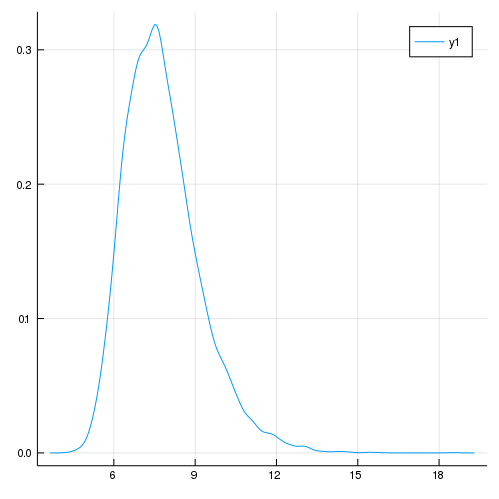

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*